In [1]:
import mailbox, pandas as pd, numpy as np 
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from dateutil.parser import parse as parse_datetime
%matplotlib inline

In [2]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', 
                               size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', 
                               size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', 
                               size=12, weight='normal', stretch='normal')

# Load the Gmail archive and parse dates/times from messages

In [3]:
# load the mbox file
path = 'mail.mbox'
mbox = mailbox.mbox(path)
print('There are {:,} messages in the archive.'.format(len(mbox)))

There are 23,465 messages in the archive.


The Gmail mbox file includes emails and hangouts chats among its "messages". Hangouts messages don't have date/time, so we'll only parse dates and times from the actual emails, and just ignore the hangouts chats. Also, some chats do have a date. To filter them out, verify that *if* the message has a label that the label does *not* include "Chat".

In [4]:
# get a list of the dates/times of all the messages in the mbox
all_dates = []
all_times = []
for message in mbox:
    # it's an email and not a chat if there's no label, 
    #or if there's a label but it's not 'chat'
    if not 'X-Gmail-Labels' in message or ('X-Gmail-Labels' in message 
                                           and not 'Chat' in message['X-Gmail-Labels']):
        if 'Date' in message and message['Date'] is not None:
            try:
                date, time = str(parse_datetime(message['Date'])).split(' ')
            except Exception as e:
                print(e, message['Date'])
            all_dates.append(date)
            all_times.append(time)
        else:
            # hangouts messages have no Date key, so skip them
            pass
print('There are {:,} messages with dates.'.format(len(all_dates)))

There are 21,105 messages with dates.


In [5]:
# get the count per date
date_counts = pd.Series(all_dates).value_counts().sort_index()
print('There are {:,} dates with messages.'.format(len(date_counts)))
date_counts

There are 1,403 dates with messages.


2012-10-04     1
2013-07-05     1
2014-05-16     1
2014-08-03     1
2014-09-23     1
              ..
2019-11-17    82
2019-11-18    97
2019-11-19    90
2019-11-20    92
2019-11-21    35
Length: 1403, dtype: int64

In [6]:
#not every date necessarily has a message, 
#so fill in missing dates in the range with zeros
date_range = pd.date_range(start=min(all_dates), end=max(all_dates), freq='D')
index = date_range.map(lambda x: str(x.date()))
date_counts = date_counts.reindex(index, fill_value=0)

print('There are {:,} dates total in the range, with or without messages.'.format(len(date_counts)))
date_counts

There are 2,605 dates total in the range, with or without messages.


2012-10-04     1
2012-10-05     0
2012-10-06     0
2012-10-07     0
2012-10-08     0
              ..
2019-11-17    82
2019-11-18    97
2019-11-19    90
2019-11-20    92
2019-11-21    35
Length: 2605, dtype: int64

In [7]:
# create a series of labels for the plot: each new year's day
xlabels = pd.Series([label if '01-01' in label 
                     else None for label in date_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]
xlabels

89      2013-01-01
454     2014-01-01
819     2015-01-01
1184    2016-01-01
1550    2017-01-01
1915    2018-01-01
2280    2019-01-01
dtype: object

findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.


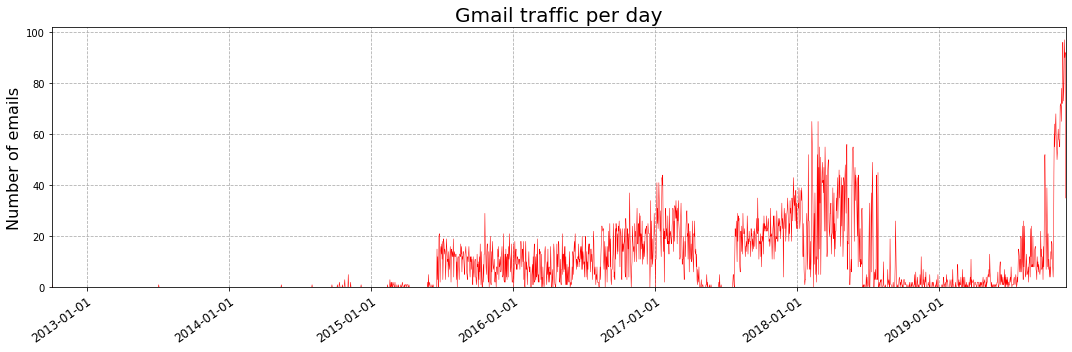

In [8]:
# plot the counts per day
fig = plt.figure(figsize=[15, 5])
ax = date_counts.plot(kind='line', linewidth=0.5, alpha=1, color='red')

ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor', 
                   ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('Gmail traffic per day', fontproperties=title_font)
fig.tight_layout()
fig.savefig('gmail-traffic-day.png', dpi=96)
plt.show()

# Plot the traffic month by month

In [13]:
# get the count per month
all_months = [x[:-3] for x in all_dates]
month_counts = pd.Series(all_months).value_counts().sort_index()
month_counts

2012-10       1
2013-07       1
2014-05       1
2014-08       1
2014-09       1
           ... 
2019-07     168
2019-08     343
2019-09     416
2019-10     855
2019-11    1514
Length: 66, dtype: int64

In [20]:
# not every month necessarily has a message, so fill in missing months in the range with zeros
date_range = pd.date_range(start=min(all_dates), end=max(all_dates), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)
month_counts

2012-10       1
2012-11       0
2012-12       0
2013-01       0
2013-02       0
           ... 
2019-07     168
2019-08     343
2019-09     416
2019-10     855
2019-11    1514
Length: 86, dtype: int64

In [40]:
# create a series of labels for the plot: each month
xlabels = pd.Series([label if '-12' in label else None for label in month_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]
xlabels

2     2012-12
14    2013-12
26    2014-12
38    2015-12
50    2016-12
62    2017-12
74    2018-12
dtype: object

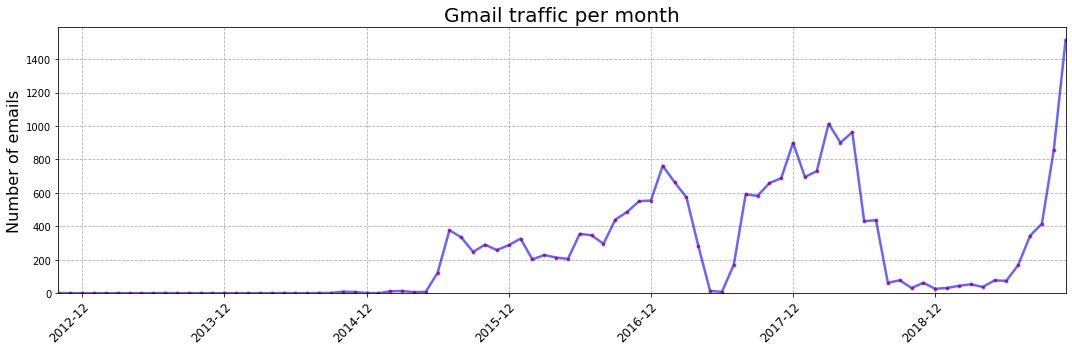

In [48]:
# plot the counts per month
fig = plt.figure(figsize=[15, 5])
ax = month_counts.plot(kind='line', linewidth=2.5, alpha=0.6, color='b', marker='.', 
                       markeredgecolor='r')

ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right', 
                   fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('Gmail traffic per month', fontproperties=title_font)
fig.tight_layout()
fig.savefig('gmail-traffic-month.png', dpi=96)
plt.show()

# Plot the Gmail traffic per day of the week

In [50]:
# get the count per day of the week
day_counts = pd.DataFrame()
day_counts['count'] = date_counts
day_counts['day_of_week'] = date_counts.index.map(lambda x: parse_datetime(x).weekday())
mean_day_counts = day_counts.groupby('day_of_week')['count'].mean()
xlabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_day_counts

day_of_week
0    8.408602
1    8.588710
2    8.900538
3    8.935657
4    8.639785
5    7.900538
6    5.336022
Name: count, dtype: float64

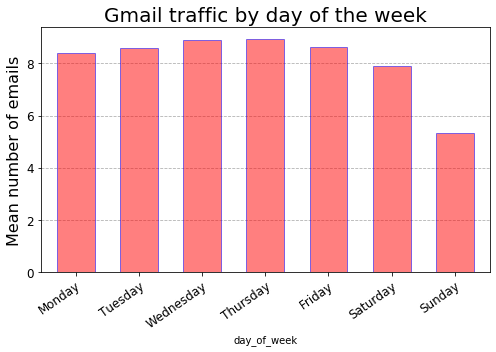

In [55]:
fig = plt.figure(figsize=[7, 5])
ax = mean_day_counts.plot(kind='bar', width=0.6, alpha=0.5, color='r', edgecolor='b',zorder=2)
#The default drawing order for axes is patches, lines, text  
#Patch / PatchCollection 	1
#Line2D / LineCollection 	2
#Text	3
ax.yaxis.grid(True, linestyle='--')
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor', ha='right', 
                   fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Gmail traffic by day of the week', fontproperties=title_font)
ax.set_ylabel('Mean number of emails', fontproperties=label_font)
fig.tight_layout()
fig.savefig('gmail-traffic by day of week.png', dpi=96)
plt.show()

# Plot the traffic by hour of the day 

In [60]:
# get the count per hour of the day
times = pd.Series(all_times).map(lambda x: '{:02}:00'.format(parse_datetime(x).hour))
time_counts = times.value_counts().sort_index()
time_counts

00:00     666
01:00     482
02:00     669
03:00     895
04:00     910
05:00     778
06:00     969
07:00    1033
08:00    1110
09:00    1259
10:00    1240
11:00    1348
12:00    1375
13:00    1219
14:00    1213
15:00    1006
16:00     919
17:00     889
18:00     747
19:00     558
20:00     463
21:00     369
22:00     489
23:00     499
dtype: int64

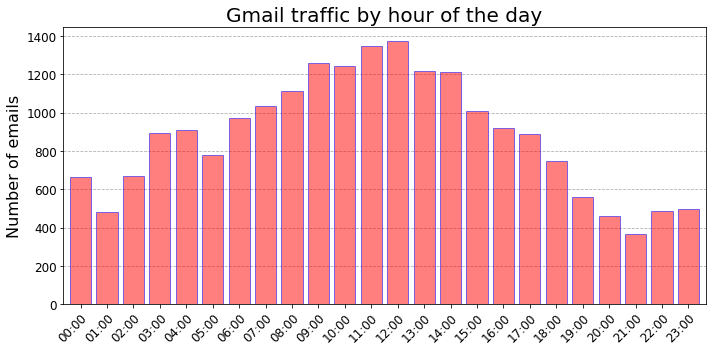

In [65]:
fig = plt.figure(figsize=[10, 5])
ax = time_counts.plot(kind='bar', width=0.8, alpha=0.5, color='r', edgecolor='b', zorder=2)

ax.yaxis.grid(True, linestyle='--')
ax.set_xticklabels(time_counts.index, rotation=45, rotation_mode='anchor', ha='right', 
                   fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Gmail traffic by hour of the day', fontproperties=title_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
fig.tight_layout()
fig.savefig('gmail traffic by hour of the day.png', dpi=96)
plt.show()

# Plot of gmail traffic by minute of the day 

In [68]:
# get the count per minute of the day, as hh:mm
minutes = pd.Series(all_times).map(lambda x: '{:02}:{:02}'.format(parse_datetime(x).hour, 
                                                                  parse_datetime(x).minute))
minute_counts = minutes.value_counts().sort_index()
minute_counts

00:00     8
00:01     6
00:02     4
00:03    10
00:04     7
         ..
23:55     4
23:56     4
23:57     6
23:58     2
23:59    13
Length: 1439, dtype: int64

In [69]:
# not every minute necessarily has a message, so fill in missing times with zeros
time_range = pd.date_range(start='0:00', end='23:59', freq='1min')
index = time_range.map(lambda x: '{:02}:{:02}'.format(x.hour, x.minute))
minute_counts = minute_counts.reindex(index, fill_value=0)
minute_counts

00:00     8
00:01     6
00:02     4
00:03    10
00:04     7
         ..
23:55     4
23:56     4
23:57     6
23:58     2
23:59    13
Length: 1440, dtype: int64

In [75]:
# create a series of labels for the plot: each new hour
xlabels = pd.Series([label if ':00' in label else None for label in minute_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]

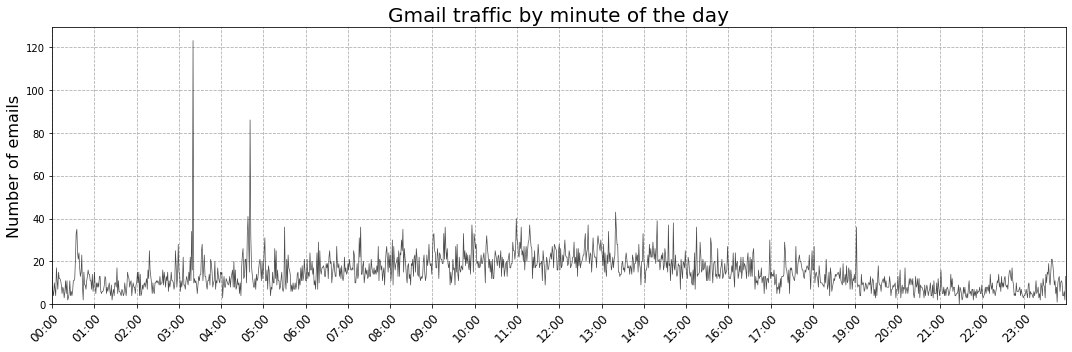

In [77]:
# plot the counts per minute
fig = plt.figure(figsize=[15, 5])
ax = minute_counts.plot(kind='line', linewidth=0.7, alpha=0.7, color='k')
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right', 
                   fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('Gmail traffic by minute of the day', fontproperties=title_font)
fig.tight_layout()
fig.savefig('gmail-traffic-minute.png', dpi=96)
plt.show()

#The following dataset has the data regarding goods sales,mode of transport,product details etc. 

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
df = pd.read_excel("Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [83]:
furniture = df.loc[df['Category'] == 'Furniture']  #calling the Furniture data from category column
furniture.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [84]:
furniture['Order Date'].min(), furniture['Order Date'].max() # calling minmum and maximum date

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [85]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 
        'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 
        'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date') 
# droping rest of the columns except Order Date ,Sales.
furniture.isnull().sum() # checking for null values

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Order Date    0
Sales         0
dtype: int64

In [86]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index() 
#   the sum of sales  according to Order  Date
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [87]:
furniture = furniture.set_index('Order Date') # setting OrderDate as index
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [88]:
#furniture sales using OrderDates monthly wise
y = furniture['Sales'].resample('M').sum() 
# resampling the sales from days to months
y

Order Date
2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7944.8370
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
2014-11-30    21564.8727
2014-12-31    30645.9665
2015-01-31    11739.9416
2015-02-28     3134.3740
2015-03-31    12499.7830
2015-04-30    10475.6985
2015-05-31     9374.9505
2015-06-30     7714.1790
2015-07-31    13674.4200
2015-08-31     9638.5922
2015-09-30    26273.0230
2015-10-31    12026.6235
2015-11-30    30880.8325
2015-12-31    23085.8192
2016-01-31     7622.7430
2016-02-29     3925.5510
2016-03-31    12801.0920
2016-04-30    13212.0900
2016-05-31    15119.8350
2016-06-30    13070.5720
2016-07-31    13068.5190
2016-08-31    12483.2323
2016-09-30    27262.8809
2016-10-31    11872.5770
2016-11-30    31783.6288
2016-12-31    36678.7150
2017-01-31     5964.0320
2017-02-28     6866.3374
2017-03-31    10893.4448
2017-04-30    

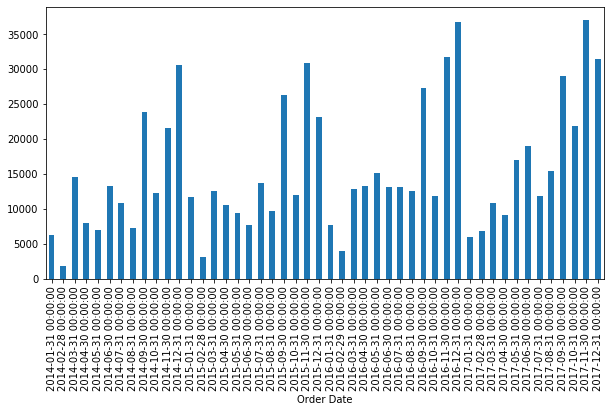

In [91]:
y.plot(kind="bar",figsize=(10,5))

In [92]:
#furniture sales Using OrderDates quarterly wise
x = furniture['Sales'].resample('Q').sum()
# resampled Sales from days to Quarterly
x

Order Date
2014-03-31    22656.1390
2014-06-30    28063.7496
2014-09-30    41957.8783
2014-12-31    64515.0862
2015-03-31    27374.0986
2015-06-30    27564.8280
2015-09-30    49586.0352
2015-12-31    65993.2752
2016-03-31    24349.3860
2016-06-30    41402.4970
2016-09-30    52814.6322
2016-12-31    80334.9208
2017-03-31    23723.8142
2017-06-30    45032.1030
2017-09-30    56283.1020
2017-12-31    90348.2500
Freq: Q-DEC, Name: Sales, dtype: float64

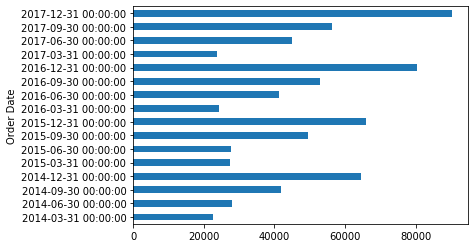

In [93]:
x.plot(kind = 'barh')

In [94]:
#furniture salesusing OrderDate yearly.
v = furniture['Sales'].resample('Y').sum() # resampled Quantity from days to Years
v

Order Date
2014-12-31    157192.8531
2015-12-31    170518.2370
2016-12-31    198901.4360
2017-12-31    215387.2692
Freq: A-DEC, Name: Sales, dtype: float64

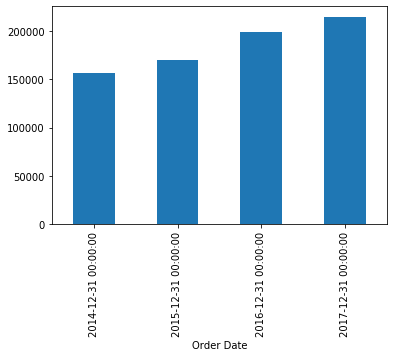

In [95]:
v.plot(kind = "bar")

In [100]:
furniture = df.loc[df['Category'] == 'Furniture'] 
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode','Sales', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name','Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date') 
# droping rest of the columns except Quantity,Order Date
furniture.isnull().sum() # checking for null values

Order Date    0
Quantity      0
dtype: int64

In [102]:
furniture = furniture.groupby('Order Date')['Quantity'].sum().reset_index() 
# here we are adding Quantity in the base of order date
furniture

,Order Date,Quantity
0,2014-01-06,9
1,2014-01-07,3
2,2014-01-10,1
3,2014-01-11,2
4,2014-01-13,9
...,...,...
884,2017-12-24,14
885,2017-12-25,14
886,2017-12-28,17
887,2017-12-29,26


In [103]:
furniture = furniture.set_index('Order Date')
furniture

,Quantity
Order Date,
2014-01-06,9
2014-01-07,3
2014-01-10,1
2014-01-11,2
2014-01-13,9
...,...
2017-12-24,14
2017-12-25,14
2017-12-28,17


In [105]:
#furniture quantity using order date(monthly).
z = furniture['Quantity'].resample('M').sum() # resampled Quantity from days to months

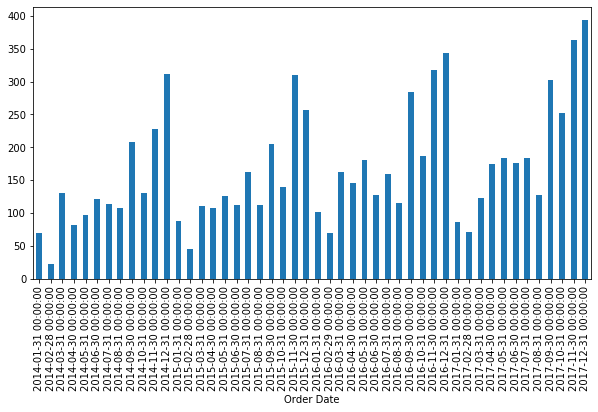

In [108]:
z.plot(kind = 'bar',figsize=(10,5))

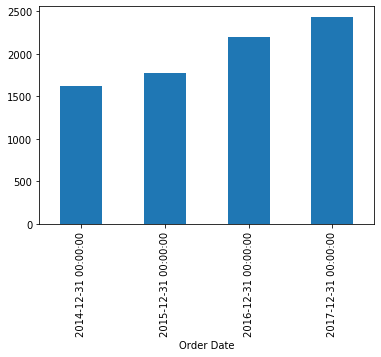

In [110]:
y = furniture['Quantity'].resample('Y').sum()
y.plot(kind = 'bar')

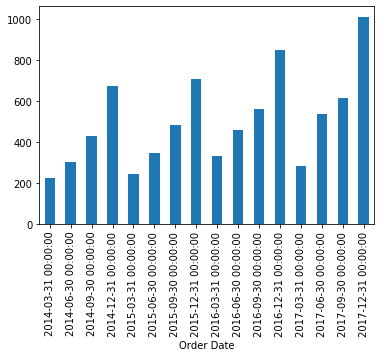

In [111]:
e = furniture['Quantity'].resample('Q').sum()
e.plot(kind = 'bar')

In [112]:
# sales according to Category
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
        'Customer ID','Sub-Category', 'Customer Name', 'Segment', 
        'Country', 'City', 'State', 'Order Date', 'Region', 'Product ID',
        'Product Name', 'Postal Code', 'Discount', 'Profit','Quantity']
df.drop(cols, axis=1, inplace=True)
caty=df.groupby("Category").count()
caty

,Sales
Category,
Furniture,2121
Office Supplies,6026
Technology,1847


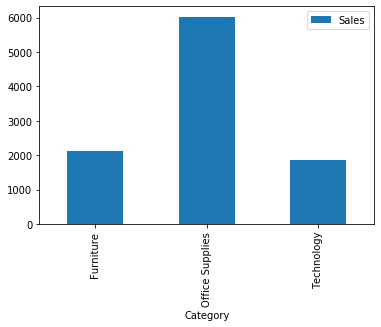

In [113]:
caty.plot(kind = 'bar')

In [115]:
# sales according to Sub-catogery
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
        'Customer Name', 'Segment', 'Country', 'City', 'State', 'Order Date', 
        'Region', 'Product ID',  'Category', 'Product Name', 'Postal Code', 
        'Discount', 'Profit','Quantity']
df.drop(cols, axis=1, inplace=True)
subcaty=df.groupby("Sub-Category").count()

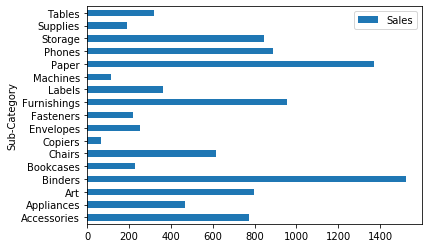

In [117]:
subcaty.plot(kind = 'barh')